<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C/ex01_%EC%9D%8C%EC%95%85_%EC%B6%94%EC%B2%9C_%EA%B8%B0%EB%8A%A5_%EA%B5%AC%ED%98%84_Contents_Based_Filtering(%EC%BD%98%ED%85%90%EC%B8%A0_%EA%B8%B0%EB%B0%98_%ED%95%84%ED%84%B0%EB%A7%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

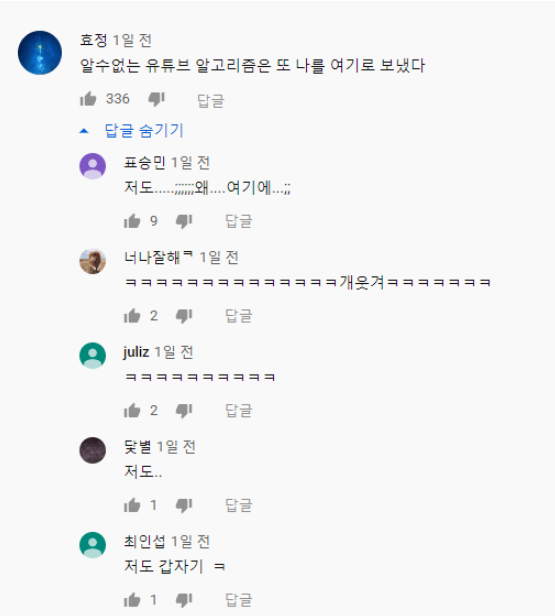

- 유튜브 뿐만 아니라 넷플릭스, 왓챠 이런 사이트는 유저의 취향에 맞는 것을 추천해줌
> 조금이라도 오래 자기 사이트에 고객을 머무르게 하기 위한 전략
>- 실제로 많은 전자상거래 업체(유튜브, 아마존, 넷플릭스, 쿠팡 등)가 추천 엔진의 고도화에 큰 비용과 노력을 들임
>- 매출을 큰 폭으로 증가시킴과 함께 사용자의 쇼핑 즐거움 또한 배가 됨

-> 이로 인해, 온라인 스토어에서의 추천 시스템은 필수 구성 요소가 됨

### 추천시스템이란?
> 사용자(user)에게 관련된 아이템(Item)을 추천해주는 것

#### 추천시스템 사례
- 이커머스 : 쿠팡과 같은 온라인 쇼핑몰에서 고객의 구매 이력과 검색을 바탕으로 제품을 추천
- 스트리밍 서비스 : 넷플릭스, 유튜브, 스포티파이 등에서 사용자의 시청/청취 이력을 바탕으로 영화, 동영상, 음악을 추천
- 뉴스 포털 : 사용자가 관심을 가질만한 뉴스 기사를 추천 등

<img src = "https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2Fa21ec021-5399-43b4-839c-6d528586f469%2F413979b5-e77a-4847-b4b2-39e1e48b2cbd%2FUntitled.png&blockId=0761ae34-9a21-4e71-a541-a287f07c7310"/>

1. 콘텐츠 기반 필터링(Contents_Based Filtering)
2. 협업(협력) 필터링(Collaborative Filtering)
- 기억 기반(Memorial Based) 또는 최근접 이웃(Nearest Neighbor) 기반
  - 사용자 기반(User Based)
  - 아이템 기반(Item Based)
- 모델 기반 협업 필터링
  - 잠재 요인(Latent Factor) 협업 필터링
  - ML/DL
3. Hybrid 방식
- 추천 시스템의 초창기에는 콘텐츠 기반, 최근접 이웃 기반 협업 필터링이 주로 사용되어 왔음
- 그러나, 넷플릭스 추천 시스템 경연 대회에서 잠재 요인 협업 필터링 방식이 우승하면서, 많은 추천 시스템의 대중화가 됨
- 하지만 서비스하는 아이템의 특성에 따라 콘텐츠 기반이나 최근접 이웃 기반을 유지하는 사이트도 존재함
- 요즘에는 개인화 특성을 좀 더 강화하기 위한 하이브리드 형식(콘텐츠와 협업을 적절히 결합)이나 딥러닝 기반이 많이 활용됨

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/추천시스템

/content/drive/MyDrive/ESTCampAI/추천시스템


### 콘텐츠 기반 필터링(Contents_Based Filtering)

- 말 그대로 비슷한 item의 특성을 기반으로 추천해주는 것
- 유사도 기반으로 쉽게 구현 가능

In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('./data/lyrics_by_year_1964_2023.csv')
# 1964년부터 2023년까지의 MELON 연도별 TOP 100 노래

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4666 non-null   int64 
 1   year     4666 non-null   int64 
 2   title    4666 non-null   object
 3   singer   4666 non-null   object
 4   lyric    4458 non-null   object
 5   x_rated  4666 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 187.0+ KB


#### 가사(lyric)를 활용한 유사도 기반으로 추천 시스템 만들어보기

#### 1. 전처리
- 1.1 결측치 제거
- 1.2 특수문자 제거

In [ ]:
# 결측치 행 제거 & 인덱스 재설정
df = df.dropna().reset_index(drop = True) # 제거한 인덱스를 컬럼으로 추가할지 여부
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4458 non-null   int64 
 1   year     4458 non-null   int64 
 2   title    4458 non-null   object
 3   singer   4458 non-null   object
 4   lyric    4458 non-null   object
 5   x_rated  4458 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 178.6+ KB


In [ ]:
# 정규표현식 활용 특수문자 제거
import re

# r"" : 원시(raw)문자열, \를 하나만 사용 가능하게끔 만듬!
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

# 알파벳, 숫자, 한글문자, 공백을 제외한 패턴
# 리뷰가 길어지는 경우, 문장 구분을 위해 공백(\s), .?! 보존
# "\s"는 공백 문자를 의미하며, 여기에는 줄바꿈(\n)도 포함됨
# ^ : not

In [ ]:
# 가사 클리닝 후 append
cleaned_lyrics = [re.sub(pattern, "", lyric) for lyric in df['lyric']]

In [ ]:
df['cleaned_lyric'] = cleaned_lyrics
df.head(3)

,id,year,title,singer,lyric,x_rated,cleaned_lyric
0,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...
1,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...
2,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...


### 2. 형태소 분석 및 불용어 처리
- 2.1 도구 설치, 불용어 사전 로드 및 형태소 분석기 초기화
- 2.2 정제 및 토큰화 함수 정의, 적용
- 2.3 컬럼 추가, 저장

In [ ]:
!pip -q install kiwipiepy konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 26.4 MB/s eta 0:00:00


In [ ]:
from kiwipiepy.utils import Stopwords

# 불용어 사전 객체 초기화
stopwords = Stopwords()

# 불용어 사전의 단어만 추출
stopwords_list = [word for word, tag in stopwords.stopwords]

In [ ]:
from konlpy.tag import Okt
from kiwipiepy import Kiwi

okt = Okt() # 형태소 분석기 초기화
kiwi = Kiwi() # 띄어쓰기 교정용으로 키위분석기 초기화

In [ ]:
# 노래의 감성에 영향을 많이 줄만한 품사 활용
# 실험을 통한 분석 결과를 기반으로 품사 설정하는 것을 권장
okt.tagset
# Adjective, Adverb, Exclamation, Verb
# Adjective(형용사) : 명사의 성질이나 상태를 나타내는 품사(ex. 좋다, 아름답다, 감동적이다)
# Adverb(부사) : 동사, 형용사, 다른 부사 또는 전체 문장을 꾸며주는 품사(wx. 매우, 정말, 천천히)
# Exclamation(감탄사) : 감탄, 놀라움, 기쁨, 분노 등 강한 감정을 독립적으로 표현하는 품사
# (ex. 와!, 아!, 우와!)
# Verb(동사) : 행위나 상태를 나타내는 품사(ex. 가다, 먹다, 하다)

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
# 정제 및 토큰화 함수 정의, 적용
def pos_tagging(text):
  # 1. 띄어쓰기 교정
  text = kiwi.space(text)

  # 2. 품사 태깅
  pos_words = okt.pos(
      text,
      stem = True, # 어간 추출
      norm = True # 정규화
  )

  # 3. 원하는 품사만 추출 & 불용어 제거
  tagged_list = []
  for word, tag in pos_words:
    # 품사가 Adjective(형용사), Adverb(부사), Exclamation(감탄사), Verb(동사) 중 하나라면
    if tag in ['Adjective', 'Adverb', 'Exclamation', 'Verb']:
      if word not in stopwords_list: # 불용어 사전에 없는 단어일 경우
        tagged_list.append(word)

  return tagged_list

In [ ]:
# 정제 및 토큰화 수행
from tqdm.auto import tqdm

tagged_lyric = [pos_tagging(text) for text in tqdm(df['cleaned_lyric'])]

  0%|          | 0/4458 [00:00<?, ?it/s]

In [ ]:
# 컬럼 추가, 저장
df['tagged_lyric'] = tagged_lyric
df.head(3)

,id,year,title,singer,lyric,x_rated,cleaned_lyric,tagged_lyric
0,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,"[잠들다, 밀리다, 들다, 외롭다, 날다, 쓸쓸하다, 잠들다, 밀리다, 들다, 외롭..."
1,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,"[끝내다, 돌아가다, 반짝이다, 스치다, 흐뭇하다, 가볍다, 헤어지다, 만나다, 끝..."
2,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,"[시원하다, 몰다, 가다, 살며시, 띄우다, 넓다, 가다, 살며시, 띄우다, 넓다,..."


In [ ]:
import pickle
df.to_pickle('data/tagged_lyrics.pkl')
# pkl로 저장하는 이유
# 'tagged_lyric'컬럼의 경우에는 데이터가 현재 리스트 형태로 들어가 있음
# 리스트 형태의 데이터를 csv 데이터로 저장하는 경우 문자열로 저장되버린다
# 데이터 타입을 그대로 유지하면서 저장하기 위해서 pkl로 저장한다

In [ ]:
# 세션이 죽었을 때 다시 불러오기!
import pandas as pd
import pickle
df = pd.read_pickle('data/tagged_lyrics.pkl')
df.head(3)

,id,year,title,singer,lyric,x_rated,cleaned_lyric,tagged_lyric
0,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,"[잠들다, 밀리다, 들다, 외롭다, 날다, 쓸쓸하다, 잠들다, 밀리다, 들다, 외롭..."
1,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,"[끝내다, 돌아가다, 반짝이다, 스치다, 흐뭇하다, 가볍다, 헤어지다, 만나다, 끝..."
2,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,"[시원하다, 몰다, 가다, 살며시, 띄우다, 넓다, 가다, 살며시, 띄우다, 넓다,..."


### 3. 벡터화
- 3.1 doc2vec준비(문서 태깅)
- 3.2 doc2vec학습
- 3.3 문서 벡터값 DF에 추가

### Doc2Vec
- word2vec : 단어 하나를 하나의 Vector화(2013년 제안)
- 주요 모델 : CBOW, Skip Gram
- Doc2Vec : 문서 하나를 하나의 Vector화(2015년 제안)
  - 주요 모델 : PV-DM model, PV-DBoW

<center>  
<img src="https://arome1004.cafe24.com/images/machine_learning/dcx03.png" width=60%>   
</center>

- DM : Distributed Memory
  - 문서 벡터와 앞의 단어를 사용해서 다음에 나오는 단어를 유추
  - 윈도우 크기 내의 단어를 input으로 사용
  - 맨 앞에서부터 한 단어씩 훈련 데이터로 사용
  - 하나의 중심 단어를 output으로 학습시키는 모델
  - 벡터가 학습 시 문서의 주제를 잡아주는 메모리와 같은 역할을 수행
  - 일반적으로 DBoW보다 더 성능이 우수
- DBoW : Distributed Bag of Word
  - ID를 가지고 단어를 랜덤하게 예측하는 방식을 사용

### 3.1 Doc2Vec 준비
- Doc2Vec 모델로 문서 벡터를 만들어내기 위해서는 각 문서를 구분할 수 있는 태그(문서ID)와 해당 문서를 구성하는 단어(토큰)목록이 함께 필요함
- gensim TaggedDocument 클래스 활용

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip -q install gensim
# gensim 설치 후에는 numpy, pandas 등 라이브러리 충돌이 발생함
# 반드시 세션 재시작이 필요함
# Drive Mount는 풀리지 않음 -> 경로(워크스페이스) 다시 잡아주기, 데이터 불러오기

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.4 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/추천시스템

/content/drive/MyDrive/ESTCampAI/추천시스템


In [ ]:
import pandas as pd
import pickle
df = pd.read_pickle('data/tagged_lyrics.pkl')

In [ ]:
# 자연어 처리, 토픽 모델링을 위한 라이브러리
import gensim
from gensim.models.doc2vec import TaggedDocument # 문서 태깅 클래스

In [ ]:
# TaggedDocument 예시 (문서 태깅)
TaggedDocument(
    tags = ['document 0'], # 각 문서를 구분할 수 있는 태그(문서ID)
    words = df['tagged_lyric'][0] # 해당 문서를 구성하는 단어(토큰)
)
# tags의 경우, 리스트로 패킹해서 여러 문서 태그를 부여할 수도 있지만,
# 보통은 문서별로 하나의 태그(ex. document 1)만 사용하는 편이 많음

TaggedDocument(words=['잠들다', '밀리다', '들다', '외롭다', '날다', '쓸쓸하다', '잠들다', '밀리다', '들다', '외롭다', '날다', '쓸쓸하다'], tags=['document 0'])

In [ ]:
tagged_corpus_list = [] # 문서 태깅 결과를 담아둘 리스트

# 각 문서에 접근하여 문서 ID 태깅
for i, tokens in enumerate(df['tagged_lyric']):
  tag = f"document {i}"
  tagged_doc = TaggedDocument(tags = [tag], words = tokens)
  tagged_corpus_list.append(tagged_doc)

In [ ]:
print(len(tagged_corpus_list))

4458


#### Doc2Vec 학습
- 문서 벡터 생성을 위한 Doc2Vec 학습

In [ ]:
from gensim.models import doc2vec

In [ ]:
# 1. Doc2Vec 모델 초기화
model = doc2vec.Doc2Vec(
    vector_size = 300, # 학습할 벡터(임베딩)의 차원 수
    alpha = 0.025, # 초기 학습률(learning rate)
    min_alpha = 0.001, # 학습 진행 중에 점차 감소시킬 최소 학습률
    window = 8, # 주변 단어(window) 범위 설정(앞뒤 8개 단어)
    min_count = 2, # 최소 등장 횟수(2회 미만 단어는 제외)
    dm = 1 # PV-DM 방식(=1), DBoW(=0)
)

In [ ]:
# 2. 단어 사전(vocabulary) 생성
# TaggedDocument 리스트를 토대로 전체에 등장하는 단어를 파악하고 모델에 등록
model.build_vocab(tagged_corpus_list)

In [ ]:
# 모델이 인식하고 있는 문서의 총 개수
model.corpus_count

4458

In [ ]:
# 3. doc2vec 모델 학습 - 문서 벡터와 단어 벡터를 기반으로 학습
model.train(
    tagged_corpus_list,
    total_examples = model.corpus_count, # 전체 문서의 개수
    epochs = 5 # 학습 반복 횟수(너무 크면 과적합의 가능성/학습속도 느려짐)
)

In [ ]:
# 벡터 확인
print(model.dv['document 0'])
print(model.dv['document 0'].shape)
# dv : document vector

[-2.28522811e-03  2.48490041e-03  1.68108178e-04  3.58405011e-03
  6.27166638e-03 -7.86229328e-04 -7.85801001e-03 -1.03827352e-02
 -1.71323225e-03  6.95647963e-04  2.33518891e-03  2.19824607e-03
  8.83417949e-03  8.37003067e-03  1.41269956e-02 -6.37838617e-03
 -1.46811511e-02 -3.29136383e-03  4.47965413e-03  6.71390770e-03
 -2.95939716e-03  8.11272766e-03 -1.21888192e-02  3.65498103e-03
 -3.37393535e-03  5.37573686e-03  1.06328924e-03 -2.60564173e-03
 -1.85021351e-03  7.80745270e-03 -1.43828988e-03  5.89823630e-03
 -3.52944969e-03 -5.15037123e-03 -2.12444295e-03  8.39883985e-04
 -3.27237812e-03 -2.51111924e-05 -2.72914581e-03  3.10195005e-03
 -6.24749623e-03  3.73840425e-03 -3.40907194e-04 -7.31036416e-04
 -1.79745327e-03 -6.75583538e-03 -3.96851031e-03  4.04932798e-04
 -6.54522562e-03 -8.62443633e-03  5.52562671e-03 -2.72308104e-03
 -7.47432001e-03 -7.63795339e-03  4.13954665e-04 -6.00748649e-03
  2.79480359e-03  4.00731806e-03  2.96914717e-03  2.46475427e-03
  2.77868612e-03  3.78477

#### 3.3 문서 벡터 값을 DF에 추가
- 문서 벡터를 기반으로 유사도 계산을 위함

In [ ]:
# 문서 벡터를 변수에 담아주기(df 개수만큼 순회, dv의 인덱스 재료로 활용)
vector_list = [model.dv[f"document {i}"] for i in range(len(df))]

In [ ]:
vector_list[:3]

[array([-2.28522811e-03,  2.48490041e-03,  1.68108178e-04,  3.58405011e-03,
         6.27166638e-03, -7.86229328e-04, -7.85801001e-03, -1.03827352e-02,
        -1.71323225e-03,  6.95647963e-04,  2.33518891e-03,  2.19824607e-03,
         8.83417949e-03,  8.37003067e-03,  1.41269956e-02, -6.37838617e-03,
        -1.46811511e-02, -3.29136383e-03,  4.47965413e-03,  6.71390770e-03,
        -2.95939716e-03,  8.11272766e-03, -1.21888192e-02,  3.65498103e-03,
        -3.37393535e-03,  5.37573686e-03,  1.06328924e-03, -2.60564173e-03,
        -1.85021351e-03,  7.80745270e-03, -1.43828988e-03,  5.89823630e-03,
        -3.52944969e-03, -5.15037123e-03, -2.12444295e-03,  8.39883985e-04,
        -3.27237812e-03, -2.51111924e-05, -2.72914581e-03,  3.10195005e-03,
        -6.24749623e-03,  3.73840425e-03, -3.40907194e-04, -7.31036416e-04,
        -1.79745327e-03, -6.75583538e-03, -3.96851031e-03,  4.04932798e-04,
        -6.54522562e-03, -8.62443633e-03,  5.52562671e-03, -2.72308104e-03,
        -7.4

In [ ]:
# DF에 추가
df['doc2vec_vector'] = vector_list
df.head(3)

,id,year,title,singer,lyric,x_rated,cleaned_lyric,tagged_lyric,doc2vec_vector
0,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,"[잠들다, 밀리다, 들다, 외롭다, 날다, 쓸쓸하다, 잠들다, 밀리다, 들다, 외롭...","[-0.002285228, 0.0024849004, 0.00016810818, 0...."
1,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,"[끝내다, 돌아가다, 반짝이다, 스치다, 흐뭇하다, 가볍다, 헤어지다, 만나다, 끝...","[0.00040486504, 0.0006584872, -0.0048016016, 0..."
2,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,"[시원하다, 몰다, 가다, 살며시, 띄우다, 넓다, 가다, 살며시, 띄우다, 넓다,...","[-0.0047638416, 0.001587431, 0.0022340505, -0...."


### 4. 유사도 기반 추천 기능 구현
- 4.1 가사 기반의 코사인 유사도 계산
- 4.2 추천 함수(기능) 정의

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 예시 : 추천 대상 곡 인덱스 선택
doc_index = 0 # 0번 곡

In [ ]:
# 1. 대상 곡의 벡터 추출
target_vector = df.loc[doc_index, "doc2vec_vector"].reshape(1, -1)
# cosine_similarity 함수는 2D 배열(샘플 수X특성 수)를 입력으로 받음
# 단일 문서 벡터는 원래 1D 배열이므로, 2D 배열로 변환해야함
# (1, -1) : 배열을 '1행, 자동계산된 열'로 재구성

target_vector.shape # 1ea의 벡터, 300ea의 차원

(1, 300)

In [ ]:
# 2. 전체 곡 벡터를 하나의 배열로 생성
all_vectors = np.stack(df['doc2vec_vector'].values, axis = 0)

# np.stack() : 여러 배열(리스트, 넘파이 배열 등)을 새로운 차원에서 하나의 배열로 결합하는 함수
# ex) 여러 개의 1D 배열(예 : 문서별 Doc2Vec 벡터)이 있을 때, 이 배열을 세로 방향(행)으로
# 쌓아 2D 배열(행렬)로 만듬

In [ ]:
all_vectors.shape # 4458ea의 벡터, 300ea 차원

(4458, 300)

In [ ]:
# 3. 대상 곡(단일)과 전체 곡(다중) 간의 코사인 유사도 계산
similarity_scores = cosine_similarity(target_vector, all_vectors)
print(similarity_scores)
print(similarity_scores.shape)

[[ 1.         -0.38650477  0.8588476  ... -0.63911223 -0.45112166
   0.37787688]]
(1, 4458)


In [ ]:
# 1차원 배열로 변환
# 1차원 배열로 만들어 각 곡에 대한 유사도 값을 쉽게 다루기 위함
similarity_scores = similarity_scores.flatten()
similarity_scores.shape

(4458,)

In [ ]:
# 4. 자기 자신(대상 곡)은 추천 결과에서 제외하기 위해 유사도 값을 -1로 설정
# 유사도를 계산했을 때 자기 자신은 값이 1로 나오기 때문에 방향을 반대로 만들어줘야 한다
similarity_scores[doc_index] = -1
similarity_scores

array([-1.        , -0.38650477,  0.8588476 , ..., -0.63911223,
       -0.45112166,  0.37787688], dtype=float32)

In [ ]:
# 5. 유사도가 높은 상위 10ea 곡의 인덱스 추출
top_n = 10
top_indices = similarity_scores.argsort()[::-1][:top_n]
# argsort() : 배열 내의 값을 오름차순으로 정렬했을 때, 각 값이 원래 배열에서 어떤 인덱스에
# 있었는지 반환해주는 함수
# [::-1] : 결과를 뒤집어 내림차순으로 만듬

top_indices # 유사도가 높은 값부터 낮은 값 순서의 인덱스 번호를 얻음

array([   2,  400, 3745, 2423, 3320, 3587,   20, 4090,  670, 3534])

In [ ]:
# 6. 최종 추천 결과 구성(곡 id, title, singer, year 및 유사도 점수)

# 대상 곡 df (멀티인덱싱으로 df화)
target_df = df.loc[[doc_index], ['id', 'title', 'singer', 'year', 'lyric']].copy()

# 추천 곡 df
result_df = df.loc[top_indices, ['id', 'title', 'singer', 'year', 'lyric']].copy()
result_df['similarity'] = similarity_scores[top_indices]

display(target_df)
display(result_df)

,id,title,singer,year,lyric
0,5758967,물새우는 해변,권혜경,1964,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...


,id,title,singer,year,lyric,similarity
2,3622464,밀짚모자 목장아가씨,박재란,1964,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,0.858848
400,3128692,아리아리아라리요,김태곤,1978,서산언덕에 올라보니\n하늘저편구름 둥실떠가네\n기다리는님 소식올까 애타는마음\n아리...,0.852847
3745,7909196,청춘 Feat 김창완,김필,2016,언젠간 가겠지 푸르른 이 청춘\n지고 또 피는 꽃잎처럼\n달밝은 밤이면 창가에 흐르...,0.837293
2423,481447,아버지,김경호,2003,가슴 깊이 묻어도 바람 한 점에 떨어지는\n저 꽃잎처럼 그 이름만 들어도 눈물이 나...,0.820611
3320,3854238,Midnight 별 헤는 밤,비스트,2012,그대는 어떤가요\n가끔은 나를 생각한 적 있나요\n이 긴 밤에 다시 눈을 감고\n그...,0.814443
3587,7942948,소녀,오혁,2015,내 곁에만 머물러요 떠나면 안돼요\n그리움 두고 머나먼 길\n그대 무지개를 찾아올 ...,0.811314
20,5674981,진주조개잡이,박재란,1965,새파란 수평선 흰구름\n흐르는 오늘도 즐거워라\n조개잡이 하는 처녀들\n흥겨운 젊은...,0.805949
4090,32508146,화려하지 않은 고백,규현 KYUHYUN,2020,언젠가 그대에게 준\n눈부신 꽃다발\n그 빛도 향기도\n머지않아 슬프게 시들고\n꽃...,0.805162
670,59193,친구여,조용필,1984,꿈은 하늘에서 잠자고\n추억은 구름 따라 흐르고\n친구여 모습은 어딜 갔나\n그리운...,0.787171
3534,4646573,너의 의미 Feat 김창완,아이유,2014,너의 그 한 마디 말도 그 웃음도\n나에겐 커다란 의미\n너의 그 작은 눈빛도\n쓸...,0.781810


In [ ]:
# 노래 추천 함수 만들어보기
def recommend_songs_by_lyric(dic_index, df, top_n = 10):
  """
  doc_index : 추천을 원하는 곡의 DF 인덱스
  df        : 전체 곡 정보가 들어있는 데이터프레임
  top_n     : 상위 몇 개를 추천할지 (기본 10개)
  """
  # 1. 대상 곡의 벡터 추출
  tv = df.loc[dic_index, "doc2vec_vector"].reshape(1, -1)

  # 2. 전체 곡 벡터를 하나의 배열로 생성
  av = np.stack(df['doc2vec_vector'].values, axis = 0)

  # 3. 대상 곡과 전체 곡간의 코사인 유사도 계산 + 1차원 변환
  ss = cosine_similarity(tv, av)
  ss = similarity_scores.flatten()

  # 4. 자기 자신(대상 곡)은 추천 결과에서 제외하기 위해 유사도 값 -1로 변경
  ss[dic_index] = -1

  # 5. 유사도가 높은 상위 10ea 곡의 인덱스 추출
  ti = ss.argsort()[::-1][:top_n]

  # 6. 최종 추천 결과 구성(곡 id, title, singer, year 및 유사도 점수)
  target_df = df.loc[[dic_index], ['id', 'title', 'singer', 'year', 'lyric']].copy()
  result_df = df.loc[ti, ['id', 'title', 'singer', 'year', 'lyric']].copy()
  result_df['similarity'] = ss[ti]

  return (target_df, result_df)

In [ ]:
target_df, result_df = recommend_songs_by_lyric(0, df, 10)
display(target_df)
display(result_df)

,id,title,singer,year,lyric
0,5758967,물새우는 해변,권혜경,1964,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...


,id,title,singer,year,lyric,similarity
2,3622464,밀짚모자 목장아가씨,박재란,1964,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,0.858848
400,3128692,아리아리아라리요,김태곤,1978,서산언덕에 올라보니\n하늘저편구름 둥실떠가네\n기다리는님 소식올까 애타는마음\n아리...,0.852847
3745,7909196,청춘 Feat 김창완,김필,2016,언젠간 가겠지 푸르른 이 청춘\n지고 또 피는 꽃잎처럼\n달밝은 밤이면 창가에 흐르...,0.837293
2423,481447,아버지,김경호,2003,가슴 깊이 묻어도 바람 한 점에 떨어지는\n저 꽃잎처럼 그 이름만 들어도 눈물이 나...,0.820611
3320,3854238,Midnight 별 헤는 밤,비스트,2012,그대는 어떤가요\n가끔은 나를 생각한 적 있나요\n이 긴 밤에 다시 눈을 감고\n그...,0.814443
3587,7942948,소녀,오혁,2015,내 곁에만 머물러요 떠나면 안돼요\n그리움 두고 머나먼 길\n그대 무지개를 찾아올 ...,0.811314
20,5674981,진주조개잡이,박재란,1965,새파란 수평선 흰구름\n흐르는 오늘도 즐거워라\n조개잡이 하는 처녀들\n흥겨운 젊은...,0.805949
4090,32508146,화려하지 않은 고백,규현 KYUHYUN,2020,언젠가 그대에게 준\n눈부신 꽃다발\n그 빛도 향기도\n머지않아 슬프게 시들고\n꽃...,0.805162
670,59193,친구여,조용필,1984,꿈은 하늘에서 잠자고\n추억은 구름 따라 흐르고\n친구여 모습은 어딜 갔나\n그리운...,0.787171
3534,4646573,너의 의미 Feat 김창완,아이유,2014,너의 그 한 마디 말도 그 웃음도\n나에겐 커다란 의미\n너의 그 작은 눈빛도\n쓸...,0.781810


### 5. 메타데이터를 활용한 추천 성능 개선
- 가사 외에도 연도나 가수 정보를 추가하여 성능 개선

> 이 외 다른 방법으로도 성능 개선 가능
>- 최신 딥러닝 임베딩 활용(S-Bert, OpenAI text-embedding-3 등)
> - 최신 딥러닝 모델은 문맥, 맥락을 반영해서 임베딩을 진행하기 때문에 임베딩의 품질이 더 높음
>- 하이브리드 필터링 방법 채택(콘텐츠 기반과 협업 필터링 방식을 결합하여 사용자 행동 데이터를 반영)
>- 모델 및 파라미터 최적화
> - Doc2Vec 외 TF-IDF, LDA 등 다른 벡터화 기법과 앙상블 적용
> - 학습 epochs, vector_size, window 등 하이퍼 파라미터 튜닝
> - 전처리 및 토큰화 정교화(노이즈 제거, 중복 제거 등 데이터 클렌징 강화)

In [ ]:
doc_index = 0
similarity_scores = cosine_similarity(target_vector, all_vectors).flatten()
similarity_scores.shape

(4458,)

#### 5.2 연도 유사도 계산

In [ ]:
# 대상 곡의 연도 추출
target_year = df.loc[doc_index, 'year']
target_year # 대상 곡의 발매 년도를 가져옴

np.int64(1964)

In [ ]:
# 전체 곡의 연도 배열 생성 (스케일러 활용을 위한 1차원 배열 -> 2차원 배열로 변환 필요)
all_years = df['year'].values.reshape(-1, 1)
all_years

array([[1964],
       [1964],
       [1964],
       ...,
       [2023],
       [2023],
       [2023]])

In [ ]:
# 대상 곡과 각 곡 간의 연도 차이의 절대값 계산
year_diff = np.abs(all_years - target_year) # 차이 계산(절대값)
year_diff

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [59],
       [59],
       [59]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 대상 곡과 다른 곡들 간의 연도 차이(year_diff)를 0~1 범위로 정규화
scaler = MinMaxScaler()
year_diff_scaled = scaler.fit_transform(year_diff)
year_diff_scaled[100:] # 차이가 클수록 1에 가까움

# 차이가 크면(즉, 연도 차이가 많이 나면) 값이 1에 가깝고, 차이가 작으면 0에 가까움
# 추천에서는 "유사도"가 높을수록 값이 1에 가깝고, 낮을수록 0에 가까워야 함

array([[0.06779661],
       [0.06779661],
       [0.06779661],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [ ]:
# 낮은 차이가 높은 유사도가 되도록 1에서 빼줌
year_sim_scaler = 1 - year_diff_scaled.flatten()
year_sim_scaler[100:]

array([0.93220339, 0.93220339, 0.93220339, ..., 0.        , 0.        ,
       0.        ])